<a href="https://colab.research.google.com/github/yairrinat/Survey_Analysis/blob/main/survey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this short script I plan to analyze the survey data we got from the WMO

# **This is a new version**


In [4]:
# load and install pakages
import pandas as pd
import re
import matplotlib.pyplot as plt

# Loading excels:

In [27]:
# link to excel file:
url_world = "https://github.com/yairrinat/Survey_Analysis/blob/main/WMO_SURVEY.xlsx?raw=true"
url_pop = "https://github.com/yairrinat/Survey_Analysis/blob/main/world_pop_all.xlsx?raw=true"
url_country_area = "https://github.com/yairrinat/Survey_Analysis/blob/main/country_area_new.xlsx?raw=true"

#load personal data:
df_personal = pd.read_excel(url_world,index_col = 0,header = 0, sheet_name = "Person details")
df_personal = df_personal.iloc[1:,:] # remove first row
#print(df_personal)

#load staff data:
df_staff = pd.read_excel(url_world,index_col=0,header = 0, sheet_name = "STAFF")
list_ind = df_staff.index.to_list()
list_ind[0] = "secondary_title"
df_staff.index= list_ind
df_staff.head(10)

#load ... to be continued later

#load population data:
df_pop = pd.read_excel(url_pop)
# select only the population density and YEAR 2020:
df_pop = df_pop[df_pop['Year'] == 2019]
df_pop = df_pop[df_pop['Series'] == "Population density"]
df_pop.drop(["Region/Country/Area","Footnotes","Source", "Series", "Year"],axis = 1, inplace = True)
df_pop.rename(columns={"Population, density and surface area"	: "Country", "Value" : "pop_density_2019"}, inplace = True)
df_pop.set_index("Country",inplace = True)
df_pop

df_staff
df = pd.concat([df_staff,df_pop])
df

,Please provide the total number of staff in your institution/organization by gender:,Unnamed: 2,"Please provide the number of staff working in the institution/organization, in the following areas along with their gender distribution: (Female/Male)",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,"Please provide the number of staff in your institution/organization with a university degree, along with their gender distribution:",Unnamed: 9,Please provide the number of staff in your institution/organization by the following age categories:,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Please indicate the trend of the staffing figures during the recent 3-5 years:,Unnamed: 16,pop_density_2019
secondary_title,Female:,Male:,Management:,Hydrological Modeling and Forecasting:,Information and Communication Technology:,Technician:,"Support (administration, security, general sup...",Female:,Male:,Less than 20 years:,21-30 years:,31-40 years:,41-50 years:,Over 51 years:,Response,Other (please specify),NaN
Albania,15,25,6,8,2,6,4,15,20,0,5,5,20,15,Steadily decreasing,NaN,NaN
Argentina,95,146,40 / 26,38 / 61,0 / 0,13 / 40,4 / 19,50,73,0,5,45,45,146,No significant year-to-year change,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,525,1083,NaN,47 flood forecasting,NaN,NaN,NaN,NaN,NaN,0,1,14,16,16,No significant year-to-year change,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.6571
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1897
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.2341
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0265


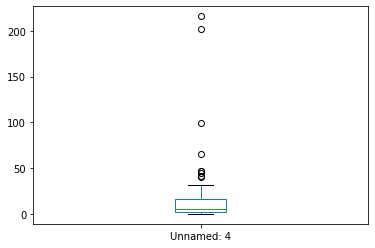

In [ ]:


aa = df_staff.iloc[1:,3]
print(aa.head())

def identity_total_personal(x_in):
  """ This funciton identify the numbers in each cell of an input dataframe,
   turns them to integers and returns their sum"""
  try:
    if type(x_in) == int or type(x_in) == float:
      return x_in
    list_nums = re.findall(r"\d+",x_in)
    list_nums2 = [int(x) for x in list_nums]
    return sum(list_nums2)
  except:
    return float("NAN")
# return re.findall(r"\d+",df)

# sum the numbers in each cell:
#if aa will be a df then I should change the map to applymap !!
new = aa.map(identity_total_personal)
print(new.head())
# drop nans:
new.dropna(inplace = True)
print(new.head())
# now for the plotting:

plt.figure()
new.plot(kind = "hist", bins = 50)
new.plot(kind = "box")

# new.head()
# # test:
# a = re.findall(r"\d+","3 jh 32" )
# print(a)
# sum([int(a[0]) , int(a[1])])

# identity_total_personal("aa")


# type(df_staff[1:,3])

